In [ ]:
using PkgTemplates


In [ ]:
typeof((1,1))

In [ ]:
a::Array{Float64,2} = rand(2,2)

In [ ]:
module tstmod
    include("tmp.jl")
    using .tmpmod
    s = Spectra()
end

In [ ]:
module tstmod2
minmax(x, y) = (y < x) ? (y, x) : (x, y)
gap((min, max)) = max - min
@show gap(minmax(10, 2))
end

In [2]:
include("tmp.jl")
import .tmpmod
s = Spectra((2,2))

LoadError: LoadError: syntax: invalid argument destructuring syntax "(resolusioneigval = 64, resolusionparam = 64)" around /Users/outk/Documents/Codes/Julia/22-7/spectraShooter/tmp.jl:4
in expression starting at /Users/outk/Documents/Codes/Julia/22-7/spectraShooter/tmp.jl:1

In [ ]:
struct testMat <: AbstractArray{Int,1}
count::Int
# testMat(count::Int) = new(count)
end
Base.size(m::testMat) = (m.count,)
Base.IndexStyle(::Type{<:testMat}) = IndexLinear()
Base.getindex(m::testMat, i::Int) = i*i

In [ ]:
struct testMat2 <: AbstractArray{Int,2}
count::Int
# testMat(count::Int) = new(count)
end
Base.size(m::testMat2) = (m.count, m.count)
Base.IndexStyle(::Type{<:testMat2}) = IndexCartesian()
Base.getindex(m::testMat2, i::Int, j::Int) = i*j
Base.getindex(m::testMat2, i::Float64, j::Float64) = round(i)*round(j)

In [ ]:
struct testMat3 <: AbstractArray{Int,1}
data::Array{Int,1}
end
Base.size(m::testMat3) = size(m.data)
Base.IndexStyle(::Type{<:testMat3}) = IndexLinear()
Base.getindex(m::testMat3, i::Int) = m.data[i]
Base.setindex!(m::testMat3, v, i::Int) = m.data[i] = v


In [ ]:
let a = testMat(5)
    @show a
    a.count = 10
end

In [ ]:
let a = testMat2(5)
    @show a[1.2,2.0]
    a.count = 10
end

In [ ]:
let a = testMat3(rand(Int, 5))
    @show a
    a[2] = 10
    a
end

In [ ]:
struct Params
    logeigvals::StepRangeLen
    logfreevals::StepRangeLen
    constvals::Tuple
end


In [ ]:
const dir = (n=0, u=1, d=2, l=3, r=4)
const 
mutable struct Seeds

end

In [ ]:
struct tst
    a::Int
end
Base.getproperty(t::tst, v::Val{:b}) =  0

In [ ]:
let x = tst(5)
    @show x.a
    @show x.b
end

In [ ]:
:(x, y)

In [ ]:
struct testStruct
    a::Int
    b::Float64
end

In [ ]:
typeof((:x, :y))

In [ ]:
typeof(:(x,y))

In [ ]:
(:(x,y)).args

In [ ]:
:x == :x

In [ ]:
typeof((a=1, b=range(1,2,3)))

In [ ]:
# write a function that takes a named tuple and returns a named tuple with the same names but with the values replaced by the result of a function applied to the values
function mapNamedTuple(f, nt)
    names = fieldnames(typeof(nt))
    vals = getfield.(Ref(nt), names)
    newvals = [typeof(val)<:StepRangeLen ? f.(val) : val for val in vals]
    return NamedTuple{names}(newvals)
end

In [ ]:
mapNamedTuple(x->x.^2, (a=1, b=2, c=range(1,2,3)))

In [ ]:
typeof(range(1,2,3)) <:StepRangeLen

In [6]:
struct testNamedTuple
    nt::NamedTuple
end
# Base.getproperty(t::testNamedTuple, v::Symbol) =  getfield(t.nt, v)
function Base.getproperty(t::testNamedTuple, s::Symbol)
    if s === :nt
        # @show "nt"
        return getfield(t, s)
    else
        # @show "else"
        return getfield(t.nt, s)
    end
end

In [2]:
nt = testNamedTuple((a=1,b=2))

testNamedTuple((a = 1, b = 2))

In [3]:
nt.nt

(a = 1, b = 2)

In [7]:
nt.b

2

In [8]:
dump(nt)

testNamedTuple
  nt: NamedTuple

{(:a, :b), Tuple{Int64, Int64}}
    a: Int64 1
    b: Int64 2


In [ ]:
fieldnames(nt)

In [10]:
"""
    Dirs

    `n`: not defined
    `u`: up(+x2)
    `d`: down(-x2)
    `l`: left(-x1)
    `r`: right(+x1)
"""
@enum Dirs n u d l r
"""
    touchobund(loc, dir)

    return true if the seed is touching the boundary in the direction dir
    return nothing if dir is not defined
"""
function touchobund(loc::Locs, dir::Dirs)
    if dir === n
        return nothing
    elseif dir === u
        return !(0 < loc.x2+1 < loc.size2)
    elseif dir === d
        return !(0 < loc.x2-1 < loc.size2)
    elseif dir === l
        return !(0 < loc.x1-1 < loc.size1)
    elseif dir === r
        return !(0 < loc.x1+1 < loc.size1)
    else
        error("invalid direction")
        return nothing
    end
end
    


In [ ]:
"""
    Locs
    
    `x1`: the position of the seed in the first direction
    `x2`: the position of the seed in the second direction
    `size1`: the number of sites in the first direction
    `size2`: the number of sites in the second direction
    `dir`: the direction of the hopping
"""
mutable struct Locs
    x1::Int
    x2::Int
    #size: the number of sites in each direction
    size1::Int # 0 < x1 < size1
    size2::Int # 0 < x2 < size2
    dir::Dirs
end


In [ ]:
function Base.setproperty!(loc::Locs, s::Symbol, v)
    if s === :x1
        @assert 0 < v < loc.size1 "x1 of loc must be between 0 and size1"
        loc.x1 = Int(v)
    elseif s === :x2
        @assert 0 < v < loc.size2 "x2 of loc must be between 0 and size2"
        loc.x2 = Int(v)
    elseif s === :size1
        @warn "size1 of the Locs struct should not be changed."
        loc.size1 = Int(v)
    elseif s === :size2
        @warn "size2 of the Locs struct should not be changed."
        loc.size2 = Int(v)
    elseif s === :dir
        loc.dir = v
    else
        error("invalid property name")
    end  
end



In [77]:
"""
    extractargswithtype(arglist, type)

    return a symbol vector with the elements of the type
"""
function extractargswithtype(arglist::NamedTuple, type::DataType)
    names = fieldnames(typeof(arglist))
    vals  = getfield.(Ref(arglist), names)
    args = Vector{Symbol}()
    for i in eachindex(vals)
        if typeof(vals[i]) <: type
            push!(args, names[i])
        end
    end
    return args
end

extractargswithtype

In [ ]:
function norder(..., x::CreationOperator, y::AnnihilationOperator, ...)
    return norder(..., y, x, ...)
end

In [ ]:
#write a function `normalorder` that takes more than two arguments of only two types `::A` and `::B`. Match the first two nearby arguments which is of the order `::B` and `::A` and return the function call with the order reversed. If there is no such pair, return the function call as it is. For example: `normalorder(a1, b1)` should return `normalorder(a1, b1)`, `normalorder(b1, a1)` should return `normalorder(a1, b1)`, `normalorder(b1, b2, a1)` should return `normalorder(b1, a1, b2)` and `normalorder(b1, a1, b2)` should return `normalorder(a1, b1, b2)`. In the example, `a1`'s type is `::A` and `b1`, `b2`'s type are `::B`. You can assume that there is only one such pair in the function call.
function normalorder(args...)
    # your code here
    
end


In [9]:
```
matchtypes

write a function that takes a tuple of arguments types `pattern` and a arbitrary number of arguments `args...`. Match the `pattern` in `args` and split the `args` into three parts: 1. arguments before the pattern is matched. 2. arguments that match the pattern. 3. arguments after the pattern is matched. Return a tuple of three parts.
```
function matchtypes(pattern::AbstractVector, args...)
    # extract types from args
    types = map(x -> typeof(x), args)
    # convert types into a AbstractVector
    types = collect(types)
    # find the first index of pattern in types
    idx = findfirst(pattern, types)
    idx = idx == nothing ? length(types) : idx
    # return a tuple of three parts
    return args[1:idx-1], args[idx:idx+length(pattern)-1], args[idx+length(pattern):end]
end

matchtypes (generic function with 2 methods)

In [ ]:
```
findfirst(pattern::AbstractVector{DataType}, collection::AbstractVector{DataType})

write a findfirst function that takes a vector of types and a vector of types and returns the index of the first element in the second vector that is of a type in the first vector. If there is no such element, return nothing.
```
function findfirst(pattern::AbstractVector{DataType}, collection::AbstractVector{DataType})
    for i in 1:length(collection)
        for j in 1:length(pattern)
            if typeof(collection[i]) == pattern[j]
                return i
            end
        end
    end
    return nothing
end

In [10]:
matchtypes([Int, Int], missing, 1, 0.1, 1, 2, 3)

MethodError: MethodError: no method matching findfirst(::Vector{DataType}, ::Vector{DataType})
Closest candidates are:
  findfirst(::AbstractArray) at array.jl:1992
  findfirst(!Matched::Function, ::Union{AbstractString, AbstractArray}) at array.jl:2074
  findfirst(!Matched::Function, ::Any) at array.jl:2066
  ...

In [13]:
collect(Int, (Real, Bool))

MethodError: MethodError: Cannot `convert` an object of type Type{Real} to an object of type Int64
Closest candidates are:
  convert(::Type{T}, !Matched::T) where T<:Number at number.jl:6
  convert(::Type{T}, !Matched::Number) where T<:Number at number.jl:7
  convert(::Type{T}, !Matched::Base.TwicePrecision) where T<:Number at twiceprecision.jl:273
  ...

In [6]:
Tuple <: AbstractVector

false

In [14]:
#write a matrix type that can be delayed to initialize until the matrix element is read or written.
#the matrix type should have a field for the data, a field for the initialization function, and a field for a boolean matrix of the same size of data that indicates whether the matrix has been initialized.
#write a getindex method for this matrix type that initializes the matrix element if it is not initialized, and then returns the requested element.
#write a setindex! method for this matrix type
#when the matrix element is read or written, the boolean should be set to true
#write a construct function that set the size of the boolean matrix to be the same as the size of the data matrix
struct DelayedMatrix{T}
    data::Matrix{T}
    init::Function
    initialized::Matrix{Bool}
    function DelayedMatrix(data::Matrix{T}, init::Function) where T
        initialized = falses(size(data))
        new{T}(data, init, initialized)
    end
end
function Base.getindex(m::DelayedMatrix, i, j)
    if !m.initialized[i,j]
        m.data[i,j] = m.init(i, j)
        m.initialized[i,j] = true
    end
    m.data[i,j]
end
function Base.setindex!(m::DelayedMatrix, v, i, j)
    m.data[i,j] = v
    m.initialized[i,j] = true
end


In [19]:
dmat = DelayedMatrix(ones(Int, 3, 3), (i, j) -> i + j)

DelayedMatrix{Int64}([1 1 1; 1 1 1; 1 1 1], var"#19#20"(), Bool[0 0 0; 0 0 0; 0 0 0])

In [20]:
dmat[1,1]

2

In [21]:
dmat

DelayedMatrix{Int64}([2 1 1; 1 1 1; 1 1 1], var"#19#20"(), Bool[1 0 0; 0 0 0; 0 0 0])

In [1]:
include("DelayedMatrices.jl")
import .DelayedMatrices#: DelayedMatrix
dmat = DelayedMatrix(zeros(Int, 3,3), (i,j)->i+j)

UndefVarError: UndefVarError: DelayedMatrix not defined

In [26]:
dmat[2,3]

5

In [27]:
dmat

DelayedMatrix{Int64}([0 0 0; 0 0 5; 0 0 0], var"#23#24"(), Bool[0 0 0; 0 0 1; 0 0 0])

In [ ]:
#write a function that takes a matrix `x` and returns a matrix `y` whose elements are 1 if the corresponding elements in `x` have neighbor of the opposite sign
#example: x = [1 2 3; 1 -2 3; 4 5 6] -> y = [0 1 0; 1 1 1; 0 1 0]



In [ ]:
#write a function that takes a matrix and two indices and returns the view of the 2 by 2 submatrix starting at those indices
#example: A = [1 2 3; 4 5 6; 7 8 9] and i = 1, j = 2 should return the view [2 3; 5 6]
function subview22(A, i, j)
    view(A, i:i+1, j:j+1)
end

In [33]:
[1 2 3; 4 5 6; 7 8 9] .> 4 .* ([1 2 3; 4 5 6; 7 8 9] .> 1)

3×3 BitMatrix:
 1  0  0
 0  1  1
 1  1  1

In [36]:
CartesianIndex(0,0) - ( CartesianIndex(1,2) - CartesianIndex(1,1) )

CartesianIndex(0, -1)

In [ ]:
#given the size of the matrix and a CartesianIndex, assert the indices is in bounds
function assert_in_bounds(size::Tuple{Int, Int}, index::CartesianIndex)
    @assert 1 <= index[1] <= size[1] && 1 <= index[2] <= size[2] "index out of bounds"
end

In [37]:
function forwardantenna(currentval::Number, forwardval::Number)
end
typeof(forwardantenna)

typeof(forwardantenna) (singleton type of function forwardantenna, subtype of Function)

In [38]:
forwardantenna

forwardantenna (generic function with 1 method)

In [40]:
@assert 1==1

In [43]:
CartesianIndex(1,1) == CartesianIndex(1,1)

true

In [46]:
[CartesianIndex(i,j) for i in -1:1, j in -1:1]

3×3 Matrix{CartesianIndex{2}}:
 CartesianIndex(-1, -1)  CartesianIndex(-1, 0)  CartesianIndex(-1, 1)
 CartesianIndex(0, -1)   CartesianIndex(0, 0)   CartesianIndex(0, 1)
 CartesianIndex(1, -1)   CartesianIndex(1, 0)   CartesianIndex(1, 1)

In [49]:
CartesianIndex(1, 0) + CartesianIndex(1, 0)

CartesianIndex(2, 0)

In [52]:
v = [1,0]


2-element Vector{Int64}:
 1
 0

In [59]:
R = [0 -1; 1 0] 

2×2 Matrix{Int64}:
 0  -1
 1   0

In [67]:
v = R*v

2-element Vector{Int64}:
  0
 -1

In [11]:
include("./TurtleSearch.jl")
using .TurtleSearch

In [3]:
[CartesianIndex(i,j) for i in 1:3, j in 1:3]

3×3 Matrix{CartesianIndex{2}}:
 CartesianIndex(1, 1)  CartesianIndex(1, 2)  CartesianIndex(1, 3)
 CartesianIndex(2, 1)  CartesianIndex(2, 2)  CartesianIndex(2, 3)
 CartesianIndex(3, 1)  CartesianIndex(3, 2)  CartesianIndex(3, 3)

In [16]:
# using Plots
mapmat = [0.7y - 3x + 5 for y in 1:10, x in 1:10];
# heatmap(mapmat)

10×10 Matrix{Float64}:
 2.7  -0.3  -3.3  -6.3  -9.3  -12.3  -15.3  -18.3  -21.3  -24.3
 3.4   0.4  -2.6  -5.6  -8.6  -11.6  -14.6  -17.6  -20.6  -23.6
 4.1   1.1  -1.9  -4.9  -7.9  -10.9  -13.9  -16.9  -19.9  -22.9
 4.8   1.8  -1.2  -4.2  -7.2  -10.2  -13.2  -16.2  -19.2  -22.2
 5.5   2.5  -0.5  -3.5  -6.5   -9.5  -12.5  -15.5  -18.5  -21.5
 6.2   3.2   0.2  -2.8  -5.8   -8.8  -11.8  -14.8  -17.8  -20.8
 6.9   3.9   0.9  -2.1  -5.1   -8.1  -11.1  -14.1  -17.1  -20.1
 7.6   4.6   1.6  -1.4  -4.4   -7.4  -10.4  -13.4  -16.4  -19.4
 8.3   5.3   2.3  -0.7  -3.7   -6.7   -9.7  -12.7  -15.7  -18.7
 9.0   6.0   3.0   0.0  -3.0   -6.0   -9.0  -12.0  -15.0  -18.0

In [28]:
mapmat[1,3]

-0.5

In [24]:
t = Turtles((m::Matrix, new, old)->1, CartesianIndex(1, 2), CartesianIndex(1, 3))

Turtles(CartesianIndex(1, 2), CartesianIndex(1, 3), var"#37#38"(), Main.TurtleSearch.usualurge)

In [2]:
include("./TurtleSearch.jl")
using .TurtleSearch


In [21]:
mapmat = [0.7y^1.1 - 3x^0.6 + 5 for y in 1:10, x in 1:10];
t = Turtles((m::Matrix, new, old)->m[new]*m[old]<0, CartesianIndex(1, 2), CartesianIndex(1, 1))
steplist = []
astep = next!(t, mapmat)
while nothing != astep
    push!(steplist, Tuple(astep))
    astep = next!(t, mapmat)
end

In [22]:
steplist

9-element Vector{Any}:
 (CartesianIndex(2, 2), CartesianIndex(2, 1))
 (CartesianIndex(3, 2), CartesianIndex(3, 1))
 (CartesianIndex(4, 2), CartesianIndex(4, 1))
 (CartesianIndex(5, 2), CartesianIndex(5, 1))
 (CartesianIndex(6, 2), CartesianIndex(6, 1))
 (CartesianIndex(7, 2), CartesianIndex(7, 1))
 (CartesianIndex(8, 2), CartesianIndex(8, 1))
 (CartesianIndex(9, 2), CartesianIndex(9, 1))
 (CartesianIndex(10, 2), CartesianIndex(10, 1))

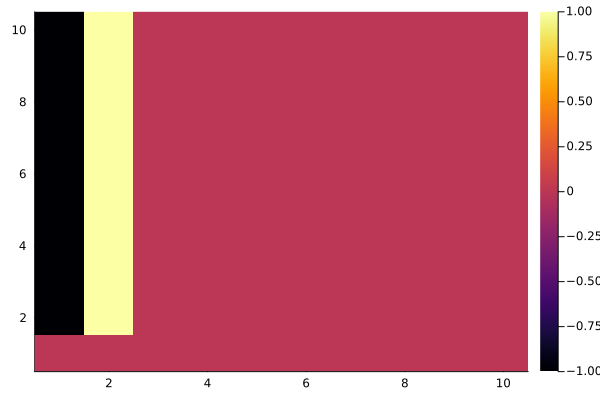

In [23]:
using Plots
steps = zeros(Int, size(mapmat))
for indxpair in steplist
    steps[indxpair[1]] = 1
    steps[indxpair[2]] = -1
end
heatmap(steps)

In [13]:
step = next!(t, mapmat)
if step != nothing
    append!(steplist, step);
end

nextaction = decidenextaction(t, mapmat) = Main.TurtleSearch.stop


In [14]:
steplist

22-element Vector{Any}:
 CartesianIndex(1, 2)
 CartesianIndex(2, 2)
 CartesianIndex(2, 3)
 CartesianIndex(2, 2)
 CartesianIndex(3, 3)
 CartesianIndex(3, 2)
 CartesianIndex(4, 3)
 CartesianIndex(4, 2)
 CartesianIndex(5, 3)
 CartesianIndex(5, 2)
 ⋮
 CartesianIndex(6, 3)
 CartesianIndex(7, 4)
 CartesianIndex(7, 3)
 CartesianIndex(8, 4)
 CartesianIndex(8, 3)
 CartesianIndex(9, 4)
 CartesianIndex(9, 3)
 CartesianIndex(10, 4)
 CartesianIndex(10, 3)

In [23]:
println(ones(2,2) * [1,2] ...)

3.03.0


In [22]:
true < true

false

In [43]:
function findfirstseed!(m, id1, id2)
    did = 2(id2 - id1)
    #check whether id1 and id2 are out of bound
    while !(id1[1] < 1 || id1[1] > size(m, 1) || id1[2] < 1 || id1[2] > size(m, 2))
        # println(id1, id2)
        if m[id1] * m[id2] > 0
            id1, id2 = id2, id1 + did
            continue
        else
            return id1, id2
        end
    end
    return nothing
end


findfirstseed! (generic function with 1 method)

In [46]:
reverse(findfirstseed!(mapmat, CartesianIndex(1, 1), CartesianIndex(1, 2)))

(CartesianIndex(1, 3), CartesianIndex(1, 2))

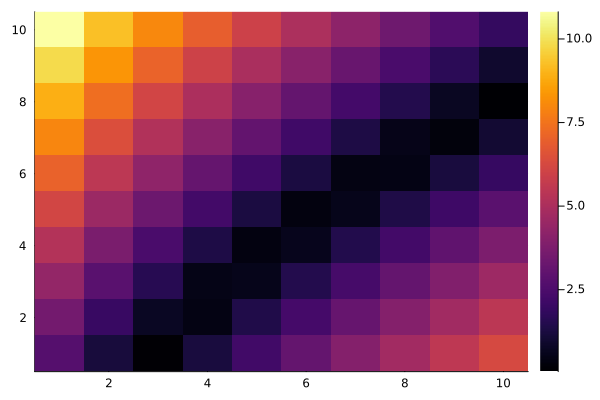

In [31]:
heatmap(abs.(mapmat))